In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def exponential_noise(oldimg, a):
    if len(oldimg.shape) == 3:  # Color image
        R, C, L = oldimg.shape
        newimg = oldimg.copy()

        for i in range(255):
            number_of_pixel = round(a * (np.exp(-(a * i))) * R * C)
            for j in range(number_of_pixel):
                row = np.random.randint(R)
                column = np.random.randint(C)
                for k in range(L):
                    newimg[row, column, k] = oldimg[row, column, k] + i

        for i in range(L):
            mn = np.min(newimg[:, :, i])
            mx = np.max(newimg[:, :, i])
            newimg[:, :, i] = ((newimg[:, :, i] - mn) / (mx - mn)) * 255

    else:  # Grayscale image
        R, C = oldimg.shape
        newimg = oldimg.copy()

        for i in range(255):
            number_of_pixel = round(a * (np.exp(-(a * i))) * R * C)
            for j in range(number_of_pixel):
                row = np.random.randint(R)
                column = np.random.randint(C)
                newimg[row, column] = oldimg[row, column] + i

        mn = np.min(newimg)
        mx = np.max(newimg)
        newimg = ((newimg - mn) / (mx - mn)) * 255

    return newimg

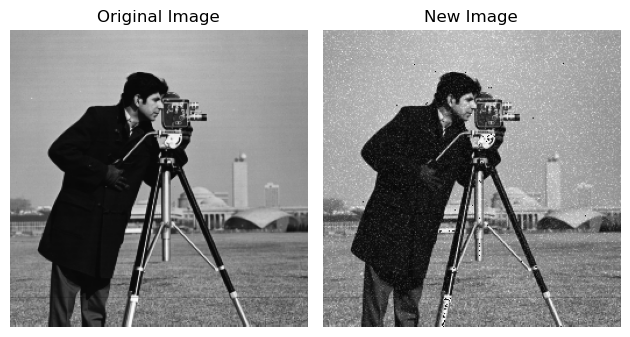

In [18]:
#Read the image
image = cv2.imread('cameraman.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Specify the parameter
a=0.1

# Apply exponential_noise function
newImage = exponential_noise(gray_image, a)

# Display the original image and new image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(newImage, cmap='gray')
plt.title('New Image')
plt.axis('off')

plt.tight_layout()
plt.show()